<a href="https://colab.research.google.com/github/clzndyal1/git_test/blob/master/3_1_KNN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

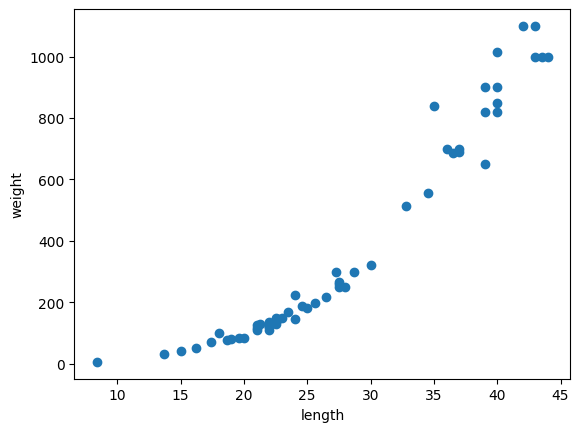

In [ ]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
print(train_input[:10], test_input[:10], train_target[:10], test_target[:10])
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22. ] [ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21. ] [  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.] [  5.9 100.  250.  130.  130.  820.  320.  188.  900.  125. ]
(42,) (14,) (42,) (14,)


In [ ]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [ ]:
test_array = test_array.reshape(2,2)
print(test_array)
print(test_array.shape)

[[1 2]
 [3 4]]
(2, 2)


In [ ]:
train_input = train_input.reshape(42,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
print(train_input[:5,:], test_input[:5,:])

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]] [[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]]


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.992809406101064


In [ ]:
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만듭니다.
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절대값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [ ]:
print(knr.score(test_input, test_target))

0.992809406101064


In [ ]:
#이웃의 개수를 3으로 설정합니다.
knr.n_neighbors = 3

#모델을 다시 훈련합니다.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))

0.9746459963987609


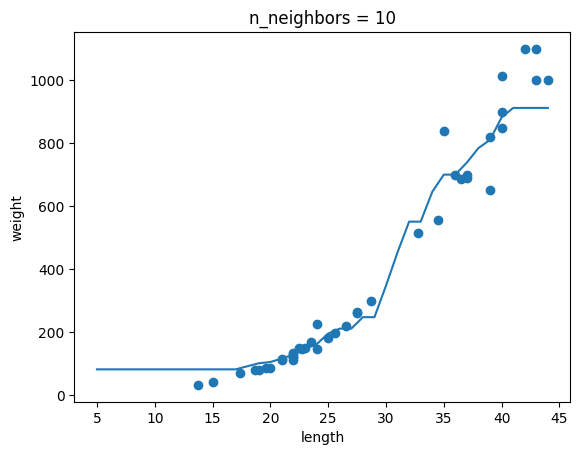

In [ ]:
#k-최근접 이웃 회귀 객체를 만듭니다.
knr = KNeighborsRegressor()
#5에서 45까지 x 좌표를 만듭니다.
x = np.arange(5,45).reshape(-1,1)

#n = 1,5,10 일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
  #모델을 훈련합니다.
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  #지정한 범위 x에 대한 예측을 구합니다.
  prediction = knr.predict(x)

plt.scatter(train_input, train_target)
plt.plot(x, prediction)
plt.title('n_neighbors = {}'.format(n))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()